<a href="https://colab.research.google.com/github/yhumadlaa/Komputasi-Statistika-Lanjut/blob/main/Data%20Modeling%20and%20Visualization/Data_Modeling_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
import pandas as pd
import numpy as np

# Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Preprocessing

In [ ]:
feature = [ 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

In [ ]:
feature

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [ ]:
X = pd.get_dummies(df[feature]) #convert categorical variable into dummy
y = df[target]

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#y.value_counts(normalize=True)

# Splitting Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split #0.7 vs 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)

In [ ]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2656,779,34,5,0.00,2,0,1,111676.63,0,0,1,1,0
445,748,26,1,77780.29,1,0,1,183049.41,1,0,0,1,0
9505,651,28,10,79562.98,1,1,1,74687.37,1,0,0,0,1
332,663,44,2,117028.60,2,0,1,144680.18,0,1,0,0,1
4168,516,37,8,0.00,1,1,0,101834.58,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,630,21,1,85818.18,1,1,1,133102.30,0,0,1,1,0
8232,582,25,9,148042.97,2,1,0,52341.15,0,0,1,0,1
5835,609,37,5,129312.79,1,1,1,26793.82,0,0,1,0,1
6689,630,41,7,107511.52,1,0,1,46156.87,0,0,1,0,1


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)


In [ ]:
coef = {'feature':X.columns, #memunculkan hasil pemodelan
'coef' : logreg.coef_[0]}

In [ ]:
pd.DataFrame(coef)

,feature,coef
0,CreditScore,-0.005053
1,Age,0.043670
2,Tenure,-0.001486
3,Balance,0.000004
4,NumOfProducts,-0.000348
5,HasCrCard,-0.000076
6,IsActiveMember,-0.001321
7,EstimatedSalary,-0.000001
8,Geography_France,-0.000832
9,Geography_Germany,0.000979


In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7886666666666666

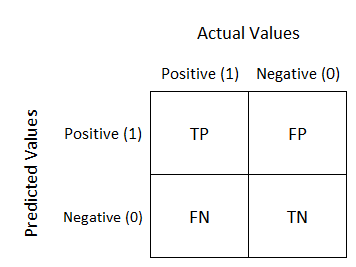

True Positive:
Interpretation: You predicted positive and it’s true.
hasilnya 1 dan benar 1.
True Negative:
Interpretation: You predicted negative and it’s true.
False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.
False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2340,   55],
       [ 579,   26]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("accuracy:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2395
           1       0.32      0.04      0.08       605

    accuracy                           0.79      3000
   macro avg       0.56      0.51      0.48      3000
weighted avg       0.70      0.79      0.72      3000

accuracy: 0.7886666666666666


# Challenge Supervised Learning
https://www.kaggle.com/prachi13/customer-analytics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer-analysis.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
feature = [ 'Warehouse_block', 'Mode_of_Shipment',
       'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender',
       'Discount_offered', 'Weight_in_gms']
target = 'Reached.on.Time_Y.N'


In [ ]:
feature

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms']

In [ ]:
X = pd.get_dummies(df[feature]) #convert categorical variable into dummy
y = df[target]

In [ ]:
X

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [ ]:
#y.value_counts(normalize=True)

In [ ]:
from sklearn.model_selection import train_test_split #0.7 vs 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)

In [ ]:
X_test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
8402,4,1,186,3,6,4758,1,0,0,0,0,0,0,1,0,1,0,1,0
2199,5,5,216,2,33,3202,0,1,0,0,0,1,0,0,1,0,0,0,1
7161,6,2,306,4,6,1123,0,1,0,0,0,0,0,1,0,1,0,1,0
6779,4,4,273,3,3,5749,0,0,0,0,1,0,0,1,0,1,0,1,0
566,3,1,163,4,20,1940,1,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,6,1,261,4,6,1703,0,0,1,0,0,1,0,0,0,1,0,1,0
10901,4,4,201,2,7,4320,0,0,0,0,1,0,0,1,0,0,1,0,1
3966,4,3,178,2,9,4322,0,0,0,1,0,0,1,0,0,0,1,1,0
4084,3,3,273,10,10,5574,0,0,1,0,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

coef = {'feature':X.columns, #memunculkan hasil pemodelan
'coef' : logreg.coef_[0]}

pd.DataFrame(coef)

,feature,coef
0,Customer_care_calls,0.000474
1,Customer_rating,0.003235
2,Cost_of_the_Product,-0.000724
3,Prior_purchases,0.000627
4,Discount_offered,0.120220
5,Weight_in_gms,-0.000147
6,Warehouse_block_A,0.000071
7,Warehouse_block_B,0.000224
8,Warehouse_block_C,0.000089
9,Warehouse_block_D,0.000126


In [ ]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6351515151515151

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 758,  564],
       [ 640, 1338]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("accuracy:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.57      0.56      1322
           1       0.70      0.68      0.69      1978

    accuracy                           0.64      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.64      0.64      0.64      3300

accuracy: 0.6351515151515151


### **LATIHAN VISUALISASI DATA**


1. Gunakan data `museum_visitors` untuk membuat Line plot semua kolom dan ganti warna setiap garis dengan mengatur argumen `pallete`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path of the file to read
museumvisitors_filepath = "/content/drive/MyDrive/Colab Notebooks/museum_visitors.csv"


In [ ]:
# Read the file into a variable spotify_data
museumvisitors_data = pd.read_csv(museumvisitors_filepath, index_col="Date", parse_dates=True)
museumvisitors_data

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694
2014-06-01,29487,5751,2121,11036
2014-07-01,32378,5406,2239,13490
2014-08-01,37680,8619,1769,9139
2014-09-01,28473,61192,1073,5661


In [ ]:
museumvisitors_data.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


In [ ]:
# Print the last 5 rows of the data
museumvisitors_data.tail()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2018-07-01,23136,4191,2620,4718
2018-08-01,20815,4866,2409,3891
2018-09-01,21020,4956,2146,3180
2018-10-01,19280,4622,2364,3775
2018-11-01,17163,4082,2385,4562


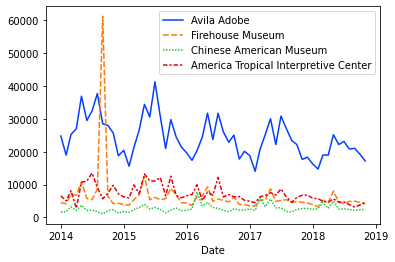

In [ ]:
# Line chart showing daily global streams of each song 
sns.lineplot(data=museumvisitors_data,palette="bright")

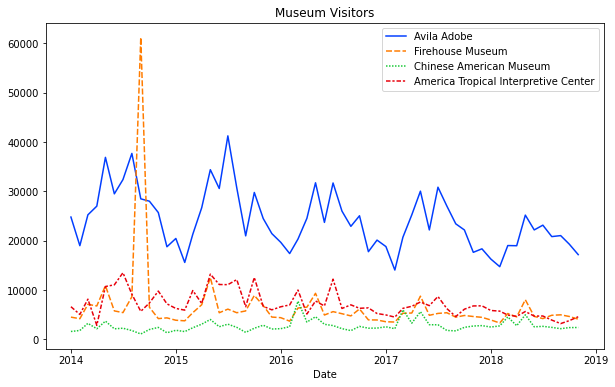

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6)) #lebar X tinggi
# Add title
plt.title("Museum Visitors")
sns.lineplot(data=museumvisitors_data, palette="bright")